In [10]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('exchage_rate.csv')
df["日期"]=pd.to_datetime(df['日期'])
df.set_index("日期" , inplace=True)
#df =df.dropna(axis=0) #drop掉有空值的raw，預設axis=0
print(df.head(3))
print(df.tail(3))

            Unnamed: 0  美元／新台幣 人民幣／新台幣   美元／人民幣
日期                                             
2013-01-08           0  29.014       -   6.2255
2013-01-09           1  29.028       -  6.22205
2013-01-10           2  28.991       -  6.22315
            Unnamed: 0  美元／新台幣   人民幣／新台幣   美元／人民幣
日期                                               
2018-01-03        3690  29.600  4.552302   6.5022
2018-01-04        3691  29.590  4.554226  6.49725
2018-01-05        3692  29.523  4.555045   6.4814


In [12]:
print(df.loc[pd.Timestamp(2022,12,23)])
#print(df.loc[datetime.now().date(),'美元／新台幣'])

Unnamed: 0        1711
美元／新台幣          30.712
人民幣／新台幣       4.390311
美元／人民幣          6.9954
Name: 2022-12-23 00:00:00, dtype: object


In [39]:
import json
from datetime import datetime,timedelta,date
import numpy as np
#設定nparray輸出為小數點格式，且到小數點後幾位
#np.set_printoptions(suppress=True, threshold=np.nan,precision=2)
#測試 Date
tempdate=datetime.now()
#預選股票
company=['2430','6281','2412','2330','2454','2308','2327','2379','2363','1217','1215','1231','1301','1310']
feature=['low','high','open','close','up_and_down','volume']
total_day=2300#共讀取300天
stock=np.zeros((len(company),len(feature),total_day), dtype=np.float)
date_list=list()
USA_exchange_list=np.zeros(total_day)
CHINA_exchange_list=np.zeros(total_day)
for i in range(total_day):
    date_list.append(None)

#讀取資料台積電歷年最低點資料
n_days_ago=1
counter=total_day
while True:
    date=datetime.strftime(tempdate-timedelta(days=n_days_ago),'%Y-%m-%d')
    path='/home/mlb/res/stock/twse/json/'+date+'.json'
    ## 漲標記 1，反之標記 0
    try:
        with open(path) as f:
            data=json.load(f)
        USA_rate=df.loc[pd.Timestamp(date),'美元／新台幣']
        CHINA_rate=float(df.loc[pd.Timestamp(date),'美元／新台幣'])/float(df.loc[pd.Timestamp(date),'美元／人民幣'])
        date_list[counter-1]=date
        USA_exchange_list[counter-1]=float(USA_rate)
        CHINA_exchange_list[counter-1]=float(CHINA_rate)
        for i in range(len(company)):
            open_price=0
            close_price=0
            for j in range(len(feature)):
                if j==4: #是漲跌feature
                    if counter==total_day: #設定漲1%為(threshold)；label
                        stock[i,j,counter-1]=None
                    else:
                        close_price=float(close_price)
                        tomorrow_close=stock[i,3,counter]
                        if tomorrow_close>close_price:
                            stock[i,j,counter-1]=int(1)
                        else:
                            stock[i,j,counter-1]=int(0)
                else:
                    stock[i,j,counter-1]=data[company[i]][feature[j]]
                    if j==3:
                        close_price=stock[i,j,counter-1]=data[company[i]][feature[j]]         
        print("date=" , date)
        counter-=1
        n_days_ago+=1
        print("counter=" ,counter)
        if (counter==0):
            break
    except:
        n_days_ago+=1
        print("escap" ,date)

    
print(date_list)

print(stock)    

escap 2023-01-05
escap 2023-01-04
escap 2023-01-03
escap 2023-01-02
escap 2023-01-01
escap 2022-12-31
date= 2022-12-30
counter= 2299
date= 2022-12-29
counter= 2298
date= 2022-12-28
counter= 2297
date= 2022-12-27
counter= 2296
date= 2022-12-26
counter= 2295
escap 2022-12-25
escap 2022-12-24
date= 2022-12-23
counter= 2294
date= 2022-12-22
counter= 2293
date= 2022-12-21
counter= 2292
date= 2022-12-20
counter= 2291
date= 2022-12-19
counter= 2290
escap 2022-12-18
escap 2022-12-17
date= 2022-12-16
counter= 2289
date= 2022-12-15
counter= 2288
date= 2022-12-14
counter= 2287
date= 2022-12-13
counter= 2286
date= 2022-12-12
counter= 2285
escap 2022-12-11
escap 2022-12-10
date= 2022-12-09
counter= 2284
date= 2022-12-08
counter= 2283
date= 2022-12-07
counter= 2282
date= 2022-12-06
counter= 2281
date= 2022-12-05
counter= 2280
escap 2022-12-04
escap 2022-12-03
date= 2022-12-02
counter= 2279
date= 2022-12-01
counter= 2278
date= 2022-11-30
counter= 2277
date= 2022-11-29
counter= 2276
escap 2022-11-28
e

date= 2022-02-08
counter= 2106
date= 2022-02-07
counter= 2105
escap 2022-02-06
escap 2022-02-05
escap 2022-02-04
escap 2022-02-03
escap 2022-02-02
escap 2022-02-01
escap 2022-01-31
escap 2022-01-30
escap 2022-01-29
escap 2022-01-28
escap 2022-01-27
date= 2022-01-26
counter= 2104
date= 2022-01-25
counter= 2103
date= 2022-01-24
counter= 2102
escap 2022-01-23
escap 2022-01-22
date= 2022-01-21
counter= 2101
date= 2022-01-20
counter= 2100
date= 2022-01-19
counter= 2099
date= 2022-01-18
counter= 2098
date= 2022-01-17
counter= 2097
escap 2022-01-16
escap 2022-01-15
date= 2022-01-14
counter= 2096
date= 2022-01-13
counter= 2095
date= 2022-01-12
counter= 2094
date= 2022-01-11
counter= 2093
date= 2022-01-10
counter= 2092
escap 2022-01-09
escap 2022-01-08
date= 2022-01-07
counter= 2091
date= 2022-01-06
counter= 2090
date= 2022-01-05
counter= 2089
date= 2022-01-04
counter= 2088
date= 2022-01-03
counter= 2087
escap 2022-01-02
escap 2022-01-01
escap 2021-12-31
date= 2021-12-30
counter= 2086
date= 202

date= 2021-03-31
counter= 1899
date= 2021-03-30
counter= 1898
date= 2021-03-29
counter= 1897
escap 2021-03-28
escap 2021-03-27
date= 2021-03-26
counter= 1896
date= 2021-03-25
counter= 1895
date= 2021-03-24
counter= 1894
date= 2021-03-23
counter= 1893
date= 2021-03-22
counter= 1892
escap 2021-03-21
escap 2021-03-20
date= 2021-03-19
counter= 1891
date= 2021-03-18
counter= 1890
date= 2021-03-17
counter= 1889
date= 2021-03-16
counter= 1888
date= 2021-03-15
counter= 1887
escap 2021-03-14
escap 2021-03-13
date= 2021-03-12
counter= 1886
date= 2021-03-11
counter= 1885
date= 2021-03-10
counter= 1884
date= 2021-03-09
counter= 1883
date= 2021-03-08
counter= 1882
escap 2021-03-07
escap 2021-03-06
date= 2021-03-05
counter= 1881
date= 2021-03-04
counter= 1880
date= 2021-03-03
counter= 1879
date= 2021-03-02
counter= 1878
escap 2021-03-01
escap 2021-02-28
escap 2021-02-27
date= 2021-02-26
counter= 1877
date= 2021-02-25
counter= 1876
date= 2021-02-24
counter= 1875
date= 2021-02-23
counter= 1874
date= 2

date= 2020-05-21
counter= 1691
date= 2020-05-20
counter= 1690
date= 2020-05-19
counter= 1689
date= 2020-05-18
counter= 1688
escap 2020-05-17
escap 2020-05-16
date= 2020-05-15
counter= 1687
date= 2020-05-14
counter= 1686
date= 2020-05-13
counter= 1685
date= 2020-05-12
counter= 1684
date= 2020-05-11
counter= 1683
escap 2020-05-10
escap 2020-05-09
date= 2020-05-08
counter= 1682
date= 2020-05-07
counter= 1681
date= 2020-05-06
counter= 1680
date= 2020-05-05
counter= 1679
date= 2020-05-04
counter= 1678
escap 2020-05-03
escap 2020-05-02
escap 2020-05-01
date= 2020-04-30
counter= 1677
date= 2020-04-29
counter= 1676
date= 2020-04-28
counter= 1675
date= 2020-04-27
counter= 1674
escap 2020-04-26
escap 2020-04-25
date= 2020-04-24
counter= 1673
date= 2020-04-23
counter= 1672
date= 2020-04-22
counter= 1671
date= 2020-04-21
counter= 1670
date= 2020-04-20
counter= 1669
escap 2020-04-19
escap 2020-04-18
date= 2020-04-17
counter= 1668
date= 2020-04-16
counter= 1667
date= 2020-04-15
counter= 1666
date= 2

date= 2019-07-09
counter= 1484
date= 2019-07-08
counter= 1483
escap 2019-07-07
escap 2019-07-06
date= 2019-07-05
counter= 1482
date= 2019-07-04
counter= 1481
date= 2019-07-03
counter= 1480
date= 2019-07-02
counter= 1479
date= 2019-07-01
counter= 1478
escap 2019-06-30
escap 2019-06-29
date= 2019-06-28
counter= 1477
date= 2019-06-27
counter= 1476
date= 2019-06-26
counter= 1475
date= 2019-06-25
counter= 1474
date= 2019-06-24
counter= 1473
escap 2019-06-23
escap 2019-06-22
date= 2019-06-21
counter= 1472
date= 2019-06-20
counter= 1471
date= 2019-06-19
counter= 1470
date= 2019-06-18
counter= 1469
date= 2019-06-17
counter= 1468
escap 2019-06-16
escap 2019-06-15
date= 2019-06-14
counter= 1467
date= 2019-06-13
counter= 1466
date= 2019-06-12
counter= 1465
date= 2019-06-11
counter= 1464
date= 2019-06-10
counter= 1463
escap 2019-06-09
escap 2019-06-08
escap 2019-06-07
date= 2019-06-06
counter= 1462
date= 2019-06-05
counter= 1461
date= 2019-06-04
counter= 1460
date= 2019-06-03
counter= 1459
escap 2

date= 2018-08-27
counter= 1278
escap 2018-08-26
escap 2018-08-25
date= 2018-08-24
counter= 1277
date= 2018-08-23
counter= 1276
date= 2018-08-22
counter= 1275
date= 2018-08-21
counter= 1274
date= 2018-08-20
counter= 1273
escap 2018-08-19
escap 2018-08-18
date= 2018-08-17
counter= 1272
date= 2018-08-16
counter= 1271
date= 2018-08-15
counter= 1270
date= 2018-08-14
counter= 1269
date= 2018-08-13
counter= 1268
escap 2018-08-12
escap 2018-08-11
date= 2018-08-10
counter= 1267
date= 2018-08-09
counter= 1266
date= 2018-08-08
counter= 1265
date= 2018-08-07
counter= 1264
date= 2018-08-06
counter= 1263
escap 2018-08-05
escap 2018-08-04
date= 2018-08-03
counter= 1262
date= 2018-08-02
counter= 1261
date= 2018-08-01
counter= 1260
date= 2018-07-31
counter= 1259
date= 2018-07-30
counter= 1258
escap 2018-07-29
escap 2018-07-28
date= 2018-07-27
counter= 1257
date= 2018-07-26
counter= 1256
date= 2018-07-25
counter= 1255
date= 2018-07-24
counter= 1254
date= 2018-07-23
counter= 1253
escap 2018-07-22
escap 2

date= 2017-10-16
counter= 1067
escap 2017-10-15
escap 2017-10-14
date= 2017-10-13
counter= 1066
date= 2017-10-12
counter= 1065
date= 2017-10-11
counter= 1064
escap 2017-10-10
escap 2017-10-09
escap 2017-10-08
escap 2017-10-07
date= 2017-10-06
counter= 1063
date= 2017-10-05
counter= 1062
escap 2017-10-04
date= 2017-10-03
counter= 1061
date= 2017-10-02
counter= 1060
escap 2017-10-01
date= 2017-09-30
counter= 1059
date= 2017-09-29
counter= 1058
date= 2017-09-28
counter= 1057
date= 2017-09-27
counter= 1056
date= 2017-09-26
counter= 1055
date= 2017-09-25
counter= 1054
escap 2017-09-24
escap 2017-09-23
date= 2017-09-22
counter= 1053
date= 2017-09-21
counter= 1052
date= 2017-09-20
counter= 1051
date= 2017-09-19
counter= 1050
date= 2017-09-18
counter= 1049
escap 2017-09-17
escap 2017-09-16
date= 2017-09-15
counter= 1048
date= 2017-09-14
counter= 1047
date= 2017-09-13
counter= 1046
date= 2017-09-12
counter= 1045
date= 2017-09-11
counter= 1044
escap 2017-09-10
escap 2017-09-09
date= 2017-09-08
c

date= 2016-10-20
counter= 843
date= 2016-10-19
counter= 842
date= 2016-10-18
counter= 841
date= 2016-10-17
counter= 840
escap 2016-10-16
escap 2016-10-15
date= 2016-10-14
counter= 839
date= 2016-10-13
counter= 838
date= 2016-10-12
counter= 837
date= 2016-10-11
counter= 836
escap 2016-10-10
escap 2016-10-09
escap 2016-10-08
date= 2016-10-07
counter= 835
date= 2016-10-06
counter= 834
date= 2016-10-05
counter= 833
date= 2016-10-04
counter= 832
date= 2016-10-03
counter= 831
escap 2016-10-02
escap 2016-10-01
date= 2016-09-30
counter= 830
date= 2016-09-29
counter= 829
escap 2016-09-28
escap 2016-09-27
date= 2016-09-26
counter= 828
escap 2016-09-25
escap 2016-09-24
date= 2016-09-23
counter= 827
date= 2016-09-22
counter= 826
date= 2016-09-21
counter= 825
date= 2016-09-20
counter= 824
date= 2016-09-19
counter= 823
escap 2016-09-18
escap 2016-09-17
escap 2016-09-16
escap 2016-09-15
date= 2016-09-14
counter= 822
date= 2016-09-13
counter= 821
date= 2016-09-12
counter= 820
escap 2016-09-11
date= 20

date= 2015-11-23
counter= 631
escap 2015-11-22
escap 2015-11-21
date= 2015-11-20
counter= 630
date= 2015-11-19
counter= 629
date= 2015-11-18
counter= 628
date= 2015-11-17
counter= 627
date= 2015-11-16
counter= 626
escap 2015-11-15
escap 2015-11-14
date= 2015-11-13
counter= 625
date= 2015-11-12
counter= 624
date= 2015-11-11
counter= 623
date= 2015-11-10
counter= 622
date= 2015-11-09
counter= 621
escap 2015-11-08
escap 2015-11-07
date= 2015-11-06
counter= 620
date= 2015-11-05
counter= 619
date= 2015-11-04
counter= 618
date= 2015-11-03
counter= 617
date= 2015-11-02
counter= 616
escap 2015-11-01
escap 2015-10-31
date= 2015-10-30
counter= 615
date= 2015-10-29
counter= 614
date= 2015-10-28
counter= 613
date= 2015-10-27
counter= 612
date= 2015-10-26
counter= 611
escap 2015-10-25
escap 2015-10-24
date= 2015-10-23
counter= 610
date= 2015-10-22
counter= 609
date= 2015-10-21
counter= 608
date= 2015-10-20
counter= 607
date= 2015-10-19
counter= 606
escap 2015-10-18
escap 2015-10-17
date= 2015-10-16

date= 2014-12-24
counter= 409
date= 2014-12-23
counter= 408
date= 2014-12-22
counter= 407
escap 2014-12-21
escap 2014-12-20
date= 2014-12-19
counter= 406
date= 2014-12-18
counter= 405
date= 2014-12-17
counter= 404
date= 2014-12-16
counter= 403
date= 2014-12-15
counter= 402
escap 2014-12-14
escap 2014-12-13
date= 2014-12-12
counter= 401
date= 2014-12-11
counter= 400
date= 2014-12-10
counter= 399
date= 2014-12-09
counter= 398
date= 2014-12-08
counter= 397
escap 2014-12-07
escap 2014-12-06
date= 2014-12-05
counter= 396
date= 2014-12-04
counter= 395
date= 2014-12-03
counter= 394
date= 2014-12-02
counter= 393
date= 2014-12-01
counter= 392
escap 2014-11-30
escap 2014-11-29
date= 2014-11-28
counter= 391
date= 2014-11-27
counter= 390
date= 2014-11-26
counter= 389
date= 2014-11-25
counter= 388
date= 2014-11-24
counter= 387
escap 2014-11-23
escap 2014-11-22
date= 2014-11-21
counter= 386
date= 2014-11-20
counter= 385
date= 2014-11-19
counter= 384
date= 2014-11-18
counter= 383
date= 2014-11-17
cou

date= 2014-01-20
counter= 188
escap 2014-01-19
escap 2014-01-18
date= 2014-01-17
counter= 187
date= 2014-01-16
counter= 186
date= 2014-01-15
counter= 185
date= 2014-01-14
counter= 184
date= 2014-01-13
counter= 183
escap 2014-01-12
escap 2014-01-11
date= 2014-01-10
counter= 182
date= 2014-01-09
counter= 181
date= 2014-01-08
counter= 180
date= 2014-01-07
counter= 179
date= 2014-01-06
counter= 178
escap 2014-01-05
escap 2014-01-04
date= 2014-01-03
counter= 177
date= 2014-01-02
counter= 176
escap 2014-01-01
date= 2013-12-31
counter= 175
date= 2013-12-30
counter= 174
escap 2013-12-29
escap 2013-12-28
date= 2013-12-27
counter= 173
date= 2013-12-26
counter= 172
date= 2013-12-25
counter= 171
date= 2013-12-24
counter= 170
date= 2013-12-23
counter= 169
escap 2013-12-22
escap 2013-12-21
date= 2013-12-20
counter= 168
date= 2013-12-19
counter= 167
date= 2013-12-18
counter= 166
date= 2013-12-17
counter= 165
date= 2013-12-16
counter= 164
escap 2013-12-15
escap 2013-12-14
date= 2013-12-13
counter= 163

In [41]:
dict_feature = dict()
data_list=list()
# make dictionnary
for i in range(len(company)):
    for j in range(len(feature)):
        '''
        if(j==4):#skip up and down 要shift
            shift_up_and_down=list(stock[i][j][1:])
            shift_up_and_down.append(None)
            print('len',len(shift_up_and_down))
            dict_feature[feature[j]] = shift_up_and_down
        else:
        '''
        dict_feature[feature[j]] = stock[i][j]
    dict_feature['USA_rate'] = USA_exchange_list
    dict_feature['CHINA_rate'] = CHINA_exchange_list
    dict_feature['date'] = date_list
    #make dataframe
    tempdf=pd.DataFrame(dict_feature)
    print(tempdf)
    data_list.append(tempdf)
    tempdf.to_csv(f"{company[i]}_data.csv")
    

        low   high   open  close  up_and_down    volume  USA_rate  CHINA_rate  \
0     46.70  47.90  47.90  46.90          0.0  459681.0    30.006    4.837571   
1     46.30  46.90  46.90  46.45          1.0  287675.0    29.992    4.842301   
2     46.50  47.90  46.50  47.45          0.0  303371.0    29.931    4.829684   
3     46.95  47.55  47.55  47.20          0.0  108020.0    29.935    4.835791   
4     47.20  47.80  47.20  47.20          0.0  250001.0    29.930    4.837211   
...     ...    ...    ...    ...          ...       ...       ...         ...   
2295  41.50  42.30  41.50  41.75          1.0   33555.0    30.708    4.400246   
2296  42.45  44.05  42.75  42.50          1.0  282893.0    30.691    4.401437   
2297  42.50  43.70  42.50  43.55          0.0  363905.0    30.715    4.404974   
2298  42.60  43.60  43.55  43.20          1.0  121172.0    30.732    4.404190   
2299  43.45  44.80  43.45  44.20          NaN  337223.0    30.708    4.409535   

            date  
0     20

       low  high  open  close  up_and_down      volume  USA_rate  CHINA_rate  \
0     69.8  70.2  70.0   69.9          0.0   5381101.0    30.006    4.837571   
1     68.5  69.9  69.9   68.5          1.0  12316177.0    29.992    4.842301   
2     68.6  70.0  68.6   70.0          0.0   5895066.0    29.931    4.829684   
3     69.4  70.4  69.5   70.0          0.0   5049239.0    29.935    4.835791   
4     69.6  70.4  69.7   70.0          0.0   3330755.0    29.930    4.837211   
...    ...   ...   ...    ...          ...         ...       ...         ...   
2295  86.5  86.9  86.8   86.9          1.0   2542286.0    30.708    4.400246   
2296  86.5  87.2  86.9   87.2          0.0   3118638.0    30.691    4.401437   
2297  86.1  87.0  86.4   86.9          0.0   5900955.0    30.715    4.404974   
2298  85.9  86.4  86.1   86.1          1.0   4060562.0    30.732    4.404190   
2299  86.6  87.2  86.7   86.8          NaN   3159102.0    30.708    4.409535   

            date  
0     2013-04-09  
1

In [42]:
data_list=list()
for i in range(len(company)):
    df = pd.read_csv(f"{company[i]}_data.csv")
    data_list.append(df)
    print(df)

      Unnamed: 0    low   high   open  close  up_and_down    volume  USA_rate  \
0              0  46.70  47.90  47.90  46.90          0.0  459681.0    30.006   
1              1  46.30  46.90  46.90  46.45          1.0  287675.0    29.992   
2              2  46.50  47.90  46.50  47.45          0.0  303371.0    29.931   
3              3  46.95  47.55  47.55  47.20          0.0  108020.0    29.935   
4              4  47.20  47.80  47.20  47.20          0.0  250001.0    29.930   
...          ...    ...    ...    ...    ...          ...       ...       ...   
2295        2295  41.50  42.30  41.50  41.75          1.0   33555.0    30.708   
2296        2296  42.45  44.05  42.75  42.50          1.0  282893.0    30.691   
2297        2297  42.50  43.70  42.50  43.55          0.0  363905.0    30.715   
2298        2298  42.60  43.60  43.55  43.20          1.0  121172.0    30.732   
2299        2299  43.45  44.80  43.45  44.20          NaN  337223.0    30.708   

      CHINA_rate        dat

In [16]:
#make 技術指標
import pandas_ta as pta
def dayt(df,day):
    close_list=list(df.loc[:,'close'])
    #print('close_list',close_list)
    #print('len',len(close_list))
    dayt_list=list()
    for i in range(day+1):
        dayt_list.append(None)
    for i in range(len(close_list)):
        if i< day+1:
            continue
        else:
            dayt=int(close_list[i-day])
            dayt_1=int(close_list[i-day-1])
            #if i < 5 :
                #print(dayt,'-',dayt_1)
            dayt_list.append((dayt-dayt_1)/dayt_1)
    df.loc[:,f'in_day{day}']=dayt_list
    return df   
def RDP(df,day):
    close_list=list(df.loc[:,'close'])
    RDP_list=list()
    for i in range(day):
        RDP_list.append(None)
    for i in range(len(close_list)):
        if i< day:
            continue
        else:
            today=int(close_list[i])
            n_day_ago=int(close_list[i-day])
            #if i < 11 :
                #print(i,'-',i-day)
                #print(today,'-',n_day_ago)
            RDP_list.append(today-n_day_ago)
    df.loc[:,f'RDP{day}']=RDP_list
    return df   
def MovingAverage(df, fun, day):
    df.loc[:, f"{fun.__name__.upper()}{day}"] = fun(
        high=df["high"], low=df["low"], close=df["close"], open=df["open"], volume=df["volume"], length=day
    )
    return df
def kdj(df, fun, day):
    result= fun(
        high=df["high"], low=df["low"], close=df["close"], open=df["open"], volume=df["volume"], length=day
    )
    df.loc[:,f'K_{day}']=result.loc[:,f'K_{day}_3']
    df.loc[:,f'D_{day}']=result.loc[:,f'D_{day}_3']
    return df
def macd(df, fun, day):
    result= fun(
        high=df["high"], low=df["low"], close=df["close"], open=df["open"], volume=df["volume"], length=day
    )
    df.loc[:,f'{fun.__name__.upper()}{day}']=result.loc[:,f'MACD_12_26_9']
    return df
def rate(df):
    sma=pta.sma(close=df["CHINA_rate"],length=10)
    wma=pta.wma(close=df["CHINA_rate"],length=10)
    macd=pta.macd(close=df["CHINA_rate"],length=10)
    mom=pta.mom(close=df["CHINA_rate"],length=10)
    usma=pta.sma(close=df["USA_rate"],length=10)
    uwma=pta.wma(close=df["USA_rate"],length=10)
    umacd=pta.macd(close=df["USA_rate"],length=10)
    umom=pta.mom(close=df["USA_rate"],length=10)
    df.loc[:,f'china_sma']=sma
    df.loc[:,f'usa_sma']=usma
    df.loc[:,f'china_wma']=wma
    df.loc[:,f'usa_wma']=uwma
    df.loc[:,f'china_mom']=mom
    df.loc[:,f'usa_mom']=umom
    df.loc[:,f'china_macd']=macd.loc[:,f'MACD_12_26_9']
    df.loc[:,f'usa_macd']=umacd.loc[:,f'MACD_12_26_9']
    return df

In [17]:
ML_list=list()
ML_subrate_list=list()
for i in range(len(company)):
    data_list[i] = MovingAverage(data_list[i], pta.sma , 10)
    data_list[i] = MovingAverage(data_list[i], pta.wma , 10)
    data_list[i] = MovingAverage(data_list[i], pta.mom , 10)
    data_list[i] = MovingAverage(data_list[i], pta.rsi , 10)
    data_list[i] = MovingAverage(data_list[i], pta.adosc , 10)
    data_list[i] = MovingAverage(data_list[i], pta.cci , 10)
    data_list[i] = kdj(data_list[i], pta.kdj , 10)
    data_list[i] = MovingAverage(data_list[i], pta.willr , 10)
    data_list[i] = macd(data_list[i], pta.macd , 10)
    #data_list[i] = rate(data_list[i])
    
    #取要進入訓練的col
    ML_columns = data_list[i].drop(["low","high","open",'date','volume','close'],axis=1,).columns
    ML_subrate_columns = data_list[i].drop(["low","high","open",'date','USA_rate','CHINA_rate','volume','close'],axis=1,).columns
    ML_df = data_list[i].loc[:, ML_columns]
    ML_df = rate(ML_df)
    ML_columns = ML_df.drop(['USA_rate','CHINA_rate'],axis=1,).columns
    ML_df = ML_df.loc[:, ML_columns]
    ML_subrate=data_list[i].loc[:, ML_subrate_columns]
    #None值處理
    ML_df = ML_df.dropna(axis=0) #drop掉有空值的raw，預設axis=0
    ML_subrate= ML_subrate.dropna(axis=0)
    #normalized_df = (ML_df - ML_df.mean()) / ML_df.std()
    
    ML_list.append(ML_df)
    ML_subrate_list.append(ML_subrate)
    print(ML_list[i])
    print(ML_subrate_list[i])

      up_and_down   SMA10      WMA10  MOM10      RSI10        ADOSC10  \
25            0.0  39.160  39.143636  -0.40  38.357751   15415.042698   
26            1.0  39.140  39.114545  -0.20  35.624152  -25147.339758   
27            0.0  39.110  39.107273  -0.30  40.347681    1313.080125   
28            0.0  39.105  39.105455  -0.05  40.347681   87136.699156   
29            1.0  39.100  39.068182  -0.05  34.159052  103796.100958   
...           ...     ...        ...    ...        ...            ...   
1794          0.0  38.120  37.819091  -2.70  28.486005 -550436.556389   
1795          1.0  37.875  37.624545  -2.45  25.193903 -564650.261987   
1796          0.0  37.805  37.701818  -0.70  44.861514 -415774.429180   
1797          1.0  37.775  37.728182  -0.30  41.469490 -364285.400710   
1798          1.0  37.795  37.860000   0.20  48.295479 -252025.216271   

           CCI10       K_10       D_10    WILLR10    MACD10  china_sma  \
25    -66.666667  32.917431  26.450998 -57.142857

      up_and_down   SMA10       WMA10  MOM10      RSI10       ADOSC10  \
25            1.0   92.97   92.158182   -4.5  13.957301 -2.377114e+06   
26            0.0   92.55   91.909091   -4.2  20.893212 -4.361211e+06   
27            0.0   92.12   91.736364   -4.3  20.893212 -6.724974e+06   
28            1.0   91.71   91.623636   -4.1  20.222377 -9.432611e+06   
29            0.0   91.71   91.676364    0.0  32.298700 -8.262735e+06   
...           ...     ...         ...    ...        ...           ...   
1794          0.0  114.65  115.000000    1.0  69.840896  8.146415e+06   
1795          1.0  114.80  115.154545    1.5  69.840896  7.574709e+06   
1796          0.0  115.05  115.372727    2.5  74.566558  6.652220e+06   
1797          1.0  115.25  115.545455    2.0  74.566558  5.670090e+06   
1798          0.0  115.50  115.772727    2.5  78.689067  4.752848e+06   

           CCI10       K_10       D_10     WILLR10    MACD10  china_sma  \
25    -59.593975   7.795451  15.790476 -100.0000

      up_and_down    SMA10        WMA10  MOM10      RSI10       ADOSC10  \
25            0.0   504.20   506.254545    2.0  44.415800 -6.731729e+06   
26            1.0   503.70   505.127273   -5.0  40.279940 -7.605564e+06   
27            0.0   504.30   504.818182    6.0  44.845138 -7.058584e+06   
28            1.0   501.50   498.400000  -28.0  26.368166 -1.212010e+07   
29            0.0   501.65   497.490909    1.5  46.701435 -9.898059e+06   
...           ...      ...          ...    ...        ...           ...   
1794          1.0  1077.00  1079.909091   10.0  59.018660 -1.125373e+06   
1795          1.0  1081.50  1087.727273   45.0  64.767974 -2.969922e+05   
1796          1.0  1088.50  1099.272727   70.0  69.519277 -5.622959e+05   
1797          1.0  1099.00  1115.000000  105.0  74.164719  3.429799e+05   
1798          1.0  1111.50  1130.636364  125.0  75.545114  6.821400e+05   

           CCI10       K_10       D_10    WILLR10     MACD10  china_sma  \
25     -0.715308  47.819

      up_and_down    SMA10       WMA10  MOM10      RSI10       ADOSC10  \
25            0.0   20.310   20.280000  -0.10  35.603696 -1.956430e+07   
26            1.0   20.285   20.178182  -0.25  31.569716 -2.017785e+07   
27            1.0   20.275   20.144545  -0.10  41.823251 -2.002578e+07   
28            0.0   20.270   20.149091  -0.05  46.877145 -1.662370e+07   
29            1.0   20.215   20.109091  -0.55  41.830142 -1.372070e+07   
...           ...      ...         ...    ...        ...           ...   
1794          0.0  454.950  458.300000  22.50  68.580620  2.084549e+06   
1795          1.0  457.500  461.581818  25.50  64.895473  1.907665e+06   
1796          0.0  460.000  465.945455  25.00  69.974683  2.204748e+06   
1797          0.0  462.950  469.218182  29.50  65.630150  6.690850e+05   
1798          1.0  465.300  471.227273  23.50  60.833947 -3.185428e+05   

           CCI10       K_10       D_10    WILLR10    MACD10  china_sma  \
25    -79.365079  28.517579  33.02801

      up_and_down   SMA10      WMA10  MOM10      RSI10       ADOSC10  \
25            0.0  11.265  11.324545   0.65  59.951206  7.056384e+05   
26            0.0  11.265  11.276364   0.00  51.584861  4.237949e+05   
27            0.0  11.260  11.219091  -0.05  50.033246  4.272004e+05   
28            0.0  11.260  11.135455   0.00  45.473899 -1.072932e+02   
29            1.0  11.145  10.979091  -1.15  35.806107 -2.635046e+05   
...           ...     ...        ...    ...        ...           ...   
1794          0.0  25.385  25.336364  -0.55  49.021355 -1.169534e+07   
1795          1.0  25.380  25.357273  -0.05  49.021355 -1.218245e+07   
1796          0.0  25.390  25.433636   0.10  54.760886 -1.029238e+07   
1797          1.0  25.450  25.508182   0.60  54.760886 -1.145924e+07   
1798          1.0  25.485  25.590000   0.35  56.764095 -1.139446e+07   

           CCI10       K_10       D_10    WILLR10    MACD10  china_sma  \
25    -16.272966  57.931966  65.852759 -51.851852  0.538997  

      up_and_down   SMA10      WMA10  MOM10      RSI10        ADOSC10  \
25            0.0  27.335  27.628182   1.70  55.462795 -229290.612455   
26            1.0  27.485  27.658182   1.50  50.185128 -580918.797153   
27            1.0  27.640  27.806364   1.55  61.141218   85778.199758   
28            0.0  27.770  27.935455   1.30  61.725794  454705.321748   
29            0.0  27.875  27.977273   1.05  55.260057  365788.933312   
...           ...     ...        ...    ...        ...            ...   
1794          0.0  80.230  80.294545   0.30  52.045142  -96541.986418   
1795          1.0  80.240  80.289091   0.10  47.385710 -105473.787872   
1796          1.0  80.260  80.300000   0.20  49.878602  -76923.771388   
1797          0.0  80.320  80.361818   0.60  56.714845  -35926.239973   
1798          0.0  80.380  80.412727   0.60  56.714845  -55427.523487   

             CCI10       K_10       D_10    WILLR10    MACD10  china_sma  \
25    5.864374e+01  71.988600  65.637844 -27.58

      up_and_down   SMA10       WMA10  MOM10      RSI10       ADOSC10  \
25            0.0   77.09   77.114545    0.4  53.056871  7.407138e+06   
26            1.0   77.14   77.225455    0.5  53.056871  7.522034e+06   
27            0.0   77.23   77.509091    0.9  65.062639  8.124531e+06   
28            0.0   77.29   77.521818    0.6  46.545279  6.600355e+06   
29            0.0   77.30   77.414545    0.1  40.989998  4.452086e+06   
...           ...     ...         ...    ...        ...           ...   
1794          0.0  103.00  103.054545   -0.5  54.553630 -3.118194e+06   
1795          1.0  103.00  103.236364    0.0  51.690124 -3.285180e+06   
1796          1.0  103.15  103.509091    1.5  54.352381 -2.560185e+06   
1797          1.0  103.30  103.845455    1.5  56.986163 -9.835522e+04   
1798          0.0  103.65  104.245455    3.5  59.577604  1.467187e+06   

           CCI10       K_10       D_10    WILLR10    MACD10  china_sma  \
25    143.695015  55.929819  44.197785 -25.000000

# RandomForest

2430  company


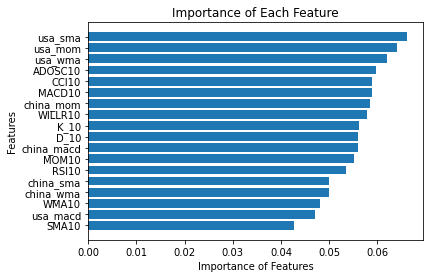

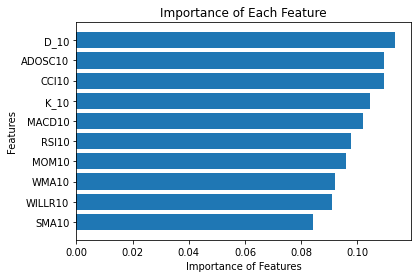

6281  company


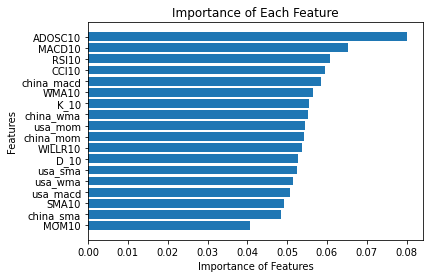

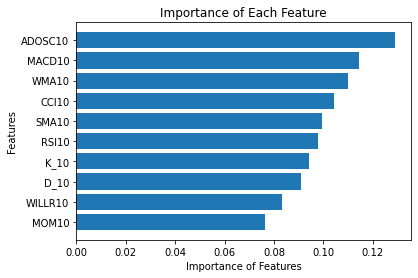

2412  company


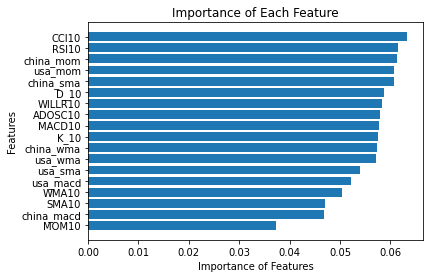

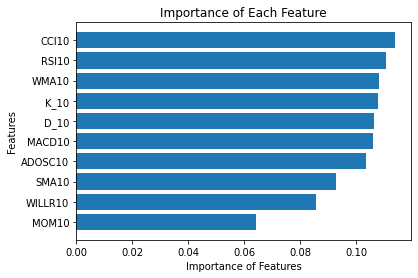

2330  company


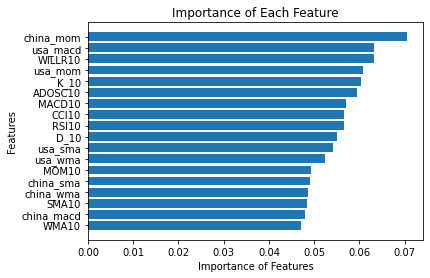

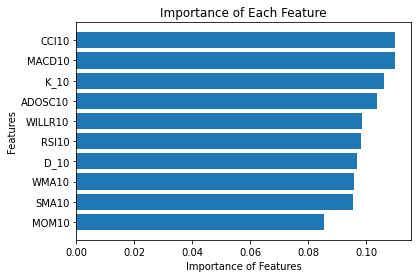

2454  company


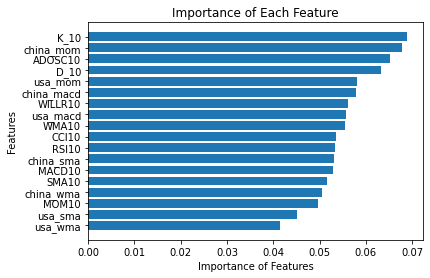

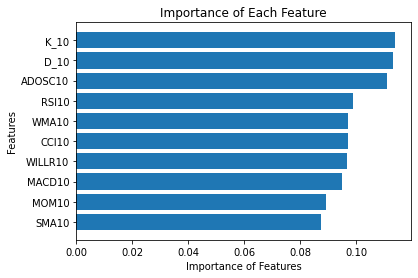

2308  company


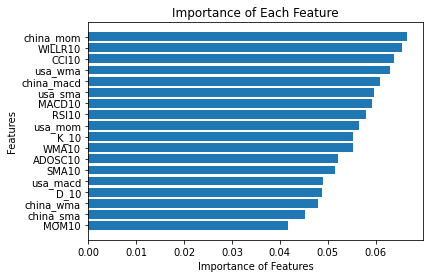

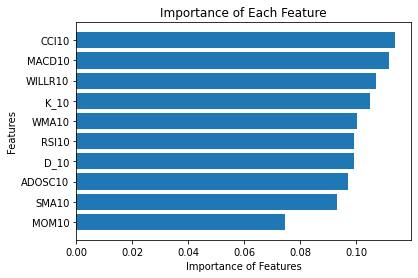

2327  company


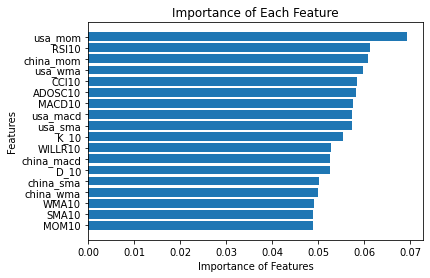

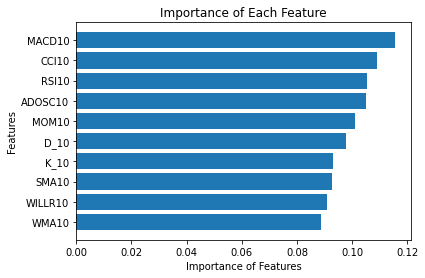

2379  company


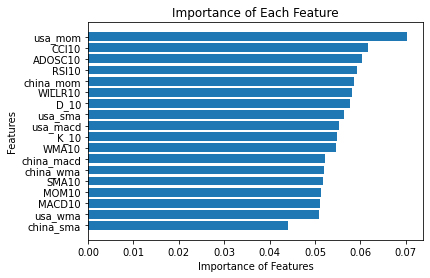

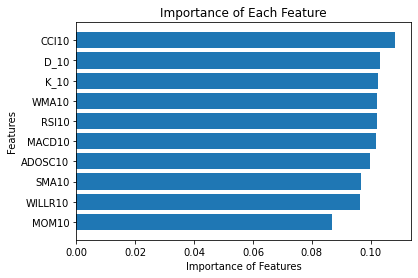

2363  company


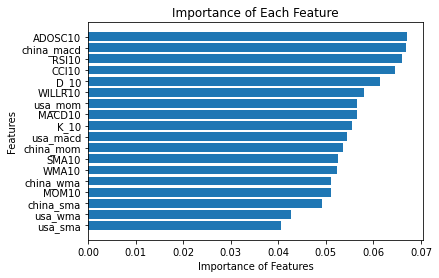

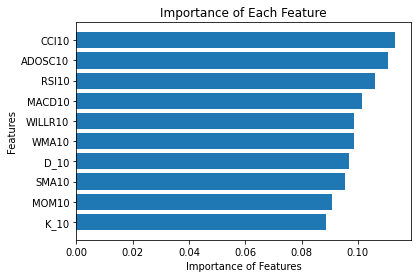

1217  company


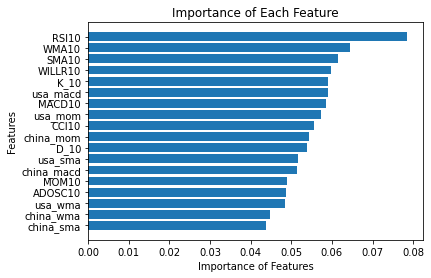

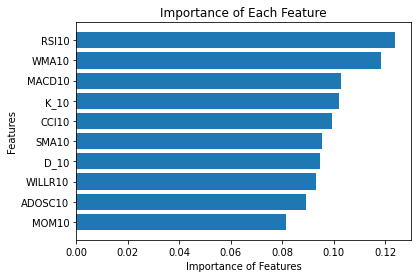

1215  company


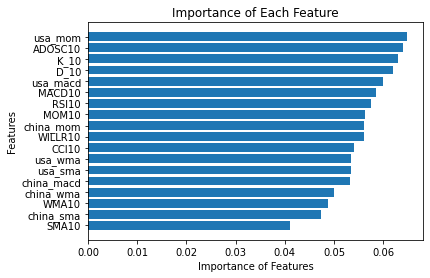

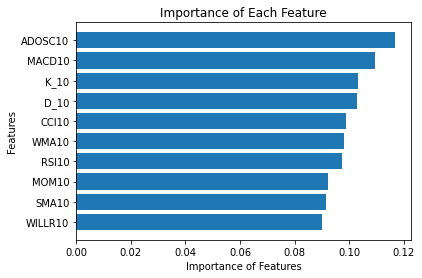

1231  company


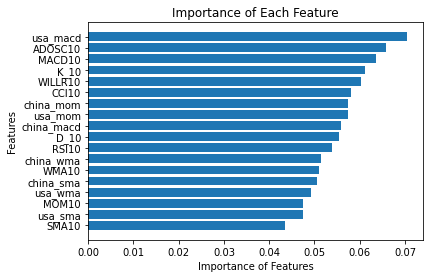

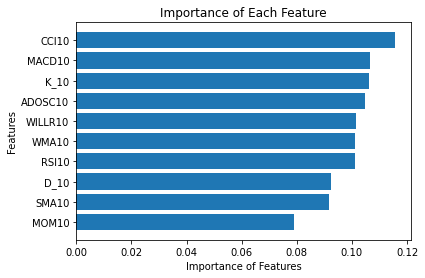

1301  company


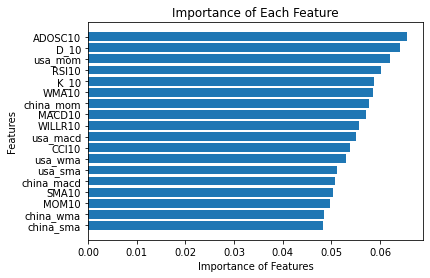

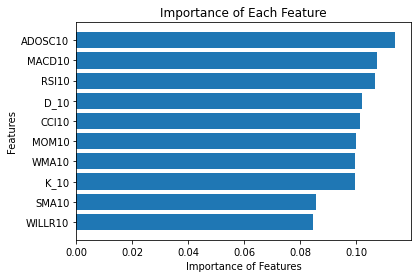

1310  company


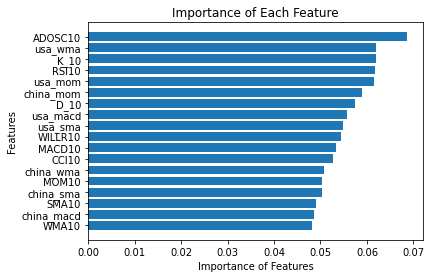

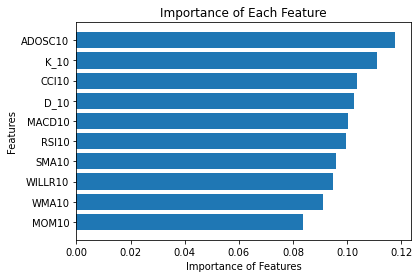

-------------------------------------------------
2430  company
train_acc 0.8622078968573731
test_acc 0.5028142589118199
train_acc_sub 0.8694601128122482
test_acc_sub 0.5272045028142589
lose
-------------------------------------------------
6281  company
train_acc 0.9178082191780822
test_acc 0.5347091932457786
train_acc_sub 0.8904109589041096
test_acc_sub 0.5609756097560976
lose
-------------------------------------------------
2412  company
train_acc 0.9089443996776793
test_acc 0.525328330206379
train_acc_sub 0.9033037872683319
test_acc_sub 0.6322701688555347
lose
-------------------------------------------------
2330  company
train_acc 0.9774375503626108
test_acc 0.50093808630394
train_acc_sub 0.9782433521353747
test_acc_sub 0.4896810506566604
win
-------------------------------------------------
2454  company
train_acc 0.9258662369057212
test_acc 0.5046904315196998
train_acc_sub 0.9476228847703465
test_acc_sub 0.5065666041275797
lose
-------------------------------------------------

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train = ML_list[i].iloc[:split_point,:].copy()
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    rfc=RandomForestClassifier(n_estimators=200,random_state=0,max_depth=9) #決定共用100棵樹 #random_state 隨機取特徵固定住，這樣準去率每一次執行就都依樣
    rfc.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(rfc.score(train_X,train_y))
    test_acc.append(rfc.score(test_X,test_y))
    imp=rfc.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp, names= zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_subrate_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train =ML_subrate_list[i].iloc[:split_point,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    rfc=RandomForestClassifier(n_estimators=200,random_state=0,max_depth=9) #決定共用100棵樹 #random_state 隨機取特徵固定住，這樣準去率每一次執行就都依樣
    rfc.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(rfc.score(train_X,train_y))
    test_acc_sub.append(rfc.score(test_X,test_y))
    imp=rfc.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp, names= zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    
    #rfc_backward = SequentialFeatureSelector(rfc, n_features_to_select=11, direction="backward").fit(train_X, train_y)
    #feature=list()
    #orignal_feature=train_X.columns
    #featureid=rfc_backward .get_support()
    #for i in range(len(featureid)):
    #    if featureid[i]==True:
    #        feature.append(orignal_feature[i])
    #print('sfs.get_support() ', rfc_backward .get_support())
    #print('orignal_feature ', orignal_feature)
    #print('feature ', feature)
    #Xtr_new =rfc_backward.transform(train_X)
    #Xte_new =rfc_backward.transform(test_X)
    #rfc.fit(train_X,train_y)
    #filename = company[i]+'_'+'up_down'+'_model.sav'
    #pickle.dump(rfc, open(filename, 'wb'))
    
    
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    '''
    imp=rfc.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp, names= zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    '''
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

# KNN
- 目前不成功
- accuracy有加沒加都一樣

2430  company


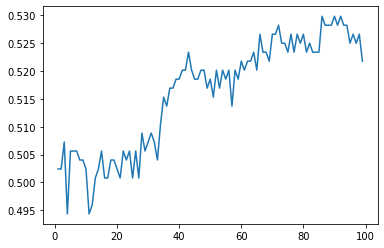

max_k=  85


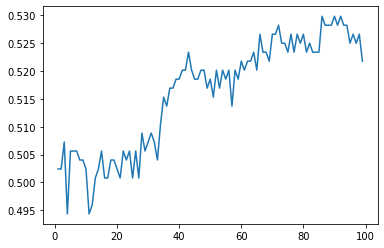

max_k=  85
win
6281  company


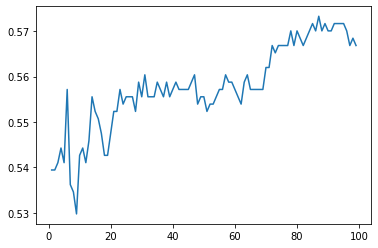

max_k=  86
      up_and_down  SMA10      WMA10  MOM10      RSI10       ADOSC10  \
25            1.0  61.58  61.841818    2.0  54.621889 -65466.379171   
26            1.0  61.78  62.063636    2.0  56.051771 -59363.038830   
27            0.0  61.98  62.285455    2.0  58.927775 -40596.986979   
28            0.0  62.14  62.434545    1.6  54.933458 -29229.330587   
29            1.0  62.23  62.481818    0.9  47.742091 -29909.032010   
...           ...    ...        ...    ...        ...           ...   
1261          0.0  66.14  66.247273    0.2  61.009307  -1141.460101   
1262          1.0  66.15  66.294545    0.1  57.276276  -2502.709892   
1263          1.0  66.23  66.358182    0.8  59.996009    276.507001   
1264          0.0  66.33  66.443636    1.0  64.953774   8921.117821   
1265          0.0  66.41  66.492727    0.8  60.769720  11646.538809   

           CCI10       K_10       D_10    WILLR10    MACD10  
25    163.355408  76.843240  57.809052  -4.761905 -1.020856  
26    150.46

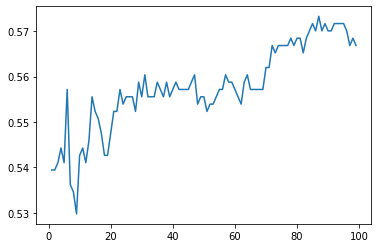

max_k=  86
win
2412  company


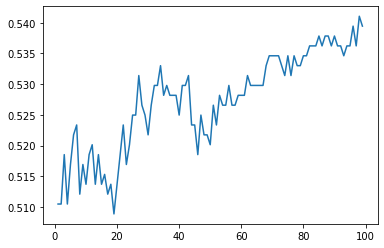

max_k=  97


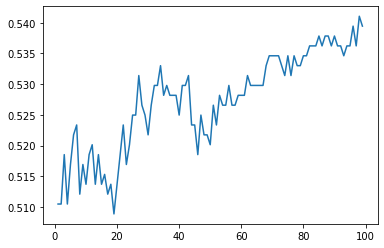

max_k=  97
win
2330  company


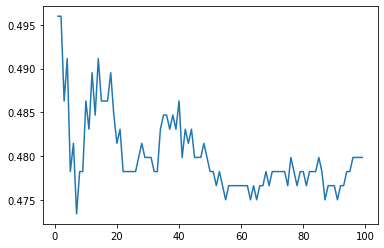

max_k=  0


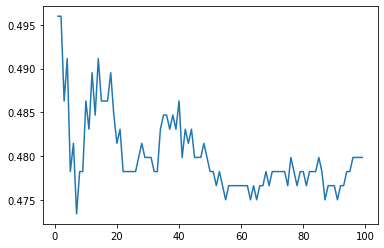

max_k=  0
win
2454  company


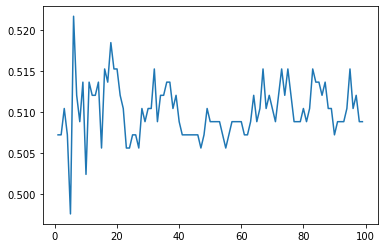

max_k=  5


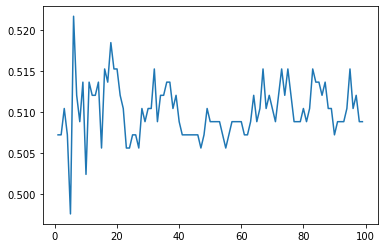

max_k=  5
win
2308  company


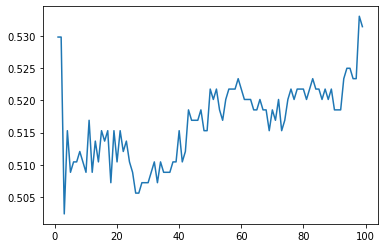

max_k=  97


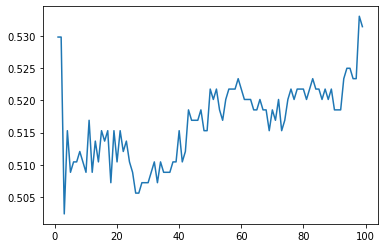

max_k=  97
win
2327  company


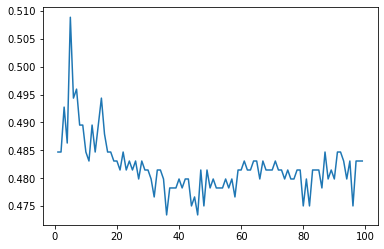

max_k=  4


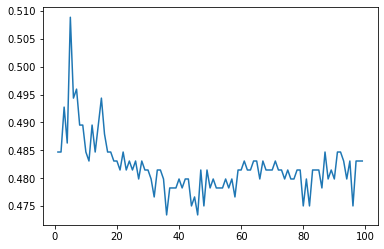

max_k=  4
win
2379  company


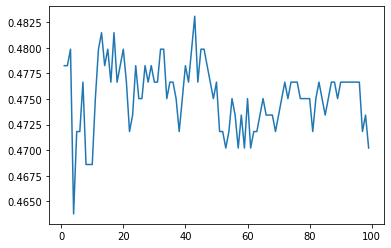

max_k=  42


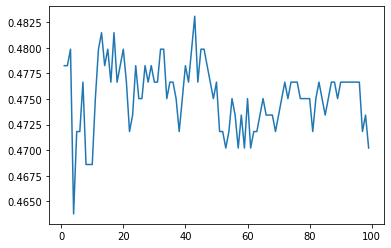

max_k=  42
win
2363  company


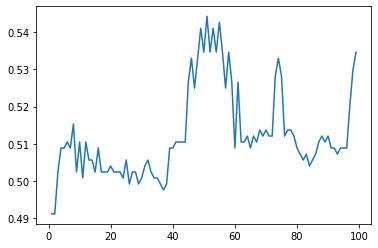

max_k=  50


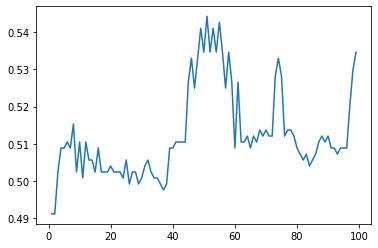

max_k=  50
win
1217  company


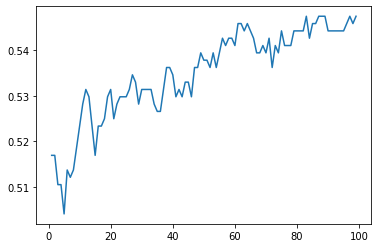

max_k=  82


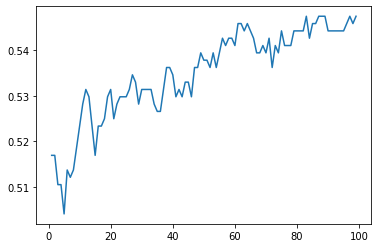

max_k=  82
win
1215  company


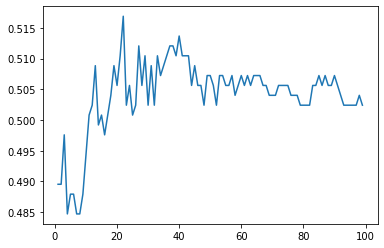

max_k=  21


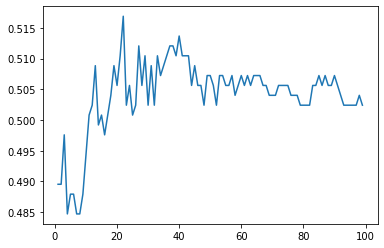

max_k=  21
win
1231  company


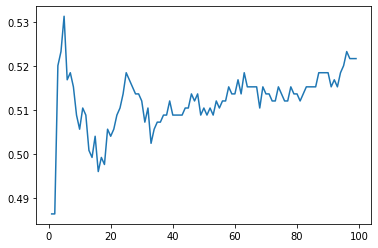

max_k=  4


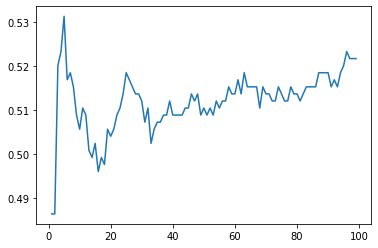

max_k=  4
win
1301  company


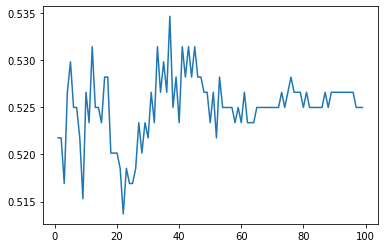

max_k=  36


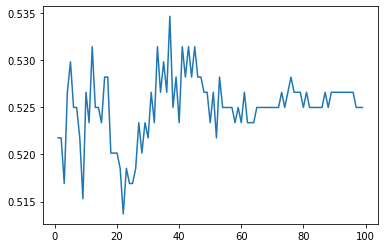

max_k=  36
win
1310  company


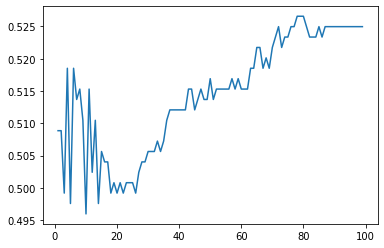

max_k=  77


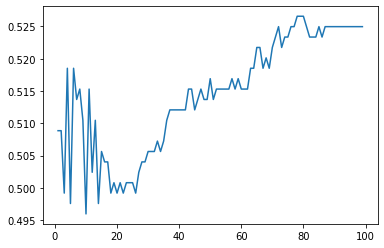

max_k=  77
win
-------------------------------------------------
2430  company
train_acc 1.0
test_acc 0.5384615384615384
train_acc_sub 1.0
test_acc_sub 0.5384615384615384
win
-------------------------------------------------
6281  company
train_acc 1.0
test_acc 0.5309568480300187
train_acc_sub 1.0
test_acc_sub 0.5309568480300187
win
-------------------------------------------------
2412  company
train_acc 1.0
test_acc 0.5272045028142589
train_acc_sub 1.0
test_acc_sub 0.5272045028142589
win
-------------------------------------------------
2330  company
train_acc 1.0
test_acc 0.5422138836772983
train_acc_sub 1.0
test_acc_sub 0.5422138836772983
win
-------------------------------------------------
2454  company
train_acc 1.0
test_acc 0.46716697936210133
train_acc_sub 1.0
test_acc_sub 0.46716697936210133
win
-------------------------------------------------
2308  company
train_acc 1.0
test_acc 0.45778611632270166
train_acc_sub 1.0
test_acc_sub 0.45778611632270166
win
---------------------

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics

test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    temp_train = ML_list[i].iloc[:split_point,:].copy()
    #print(temp_train)
    split_point_2=int(len(temp_train)*0.5)
    train =temp_train.iloc[:split_point_2,:].copy()
    #print(train)
    valid =temp_train.iloc[split_point_2:,:].copy()
    #print(valid)
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    valid_X = valid.drop('up_and_down', axis = 1)
    valid_y = valid.up_and_down
    
    accuracy = []
    for k in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance')  
        knn.fit(train_X,train_y)
        accuracy.append(knn.score(valid_X,valid_y))
    k_range = range(1,100)
    plt.plot(k_range, accuracy)
    plt.show()
    max_value = max(accuracy)
    index=accuracy.index(max_value)
    print('max_k= ',index)
    
    
    clf=KNeighborsClassifier(n_neighbors=index+1,p=2,weights='distance')
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(clf.score(train_X,train_y))
    test_acc.append(clf.score(test_X,test_y))
    
    
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    temp_train = ML_subrate_list[i].iloc[:split_point,:].copy()
    
    split_point_2=int(len(temp_train)*0.5)
    train =temp_train.iloc[:split_point_2,:].copy()
    
    valid =temp_train.iloc[split_point_2:,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    if i==1:
        print(temp_train)
        print(train)
        print(test)
    
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    valid_X = valid.drop('up_and_down', axis = 1)
    valid_y = valid.up_and_down
    
    accuracy = []
    for k in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance')  
        knn.fit(train_X,train_y)
        accuracy.append(knn.score(valid_X,valid_y))
    k_range = range(1,100)
    plt.plot(k_range, accuracy)
    plt.show()
    max_value = max(accuracy)
    index=accuracy.index(max_value)
    print('max_k= ',index)
    

    
    clf=KNeighborsClassifier(n_neighbors=index+1,p=2,weights='distance')
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(clf.score(train_X,train_y))
    test_acc_sub.append(clf.score(test_X,test_y))
    
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
    else:
        print('lose')
    
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

# GradientBoostingClassifier


2430  company


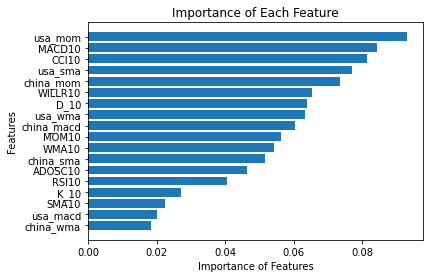

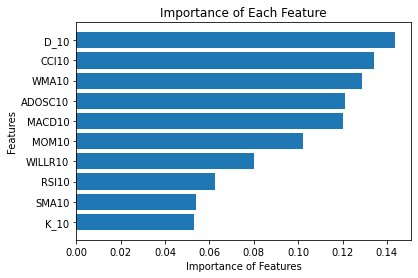

lose
6281  company


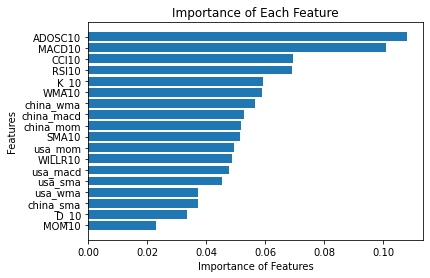

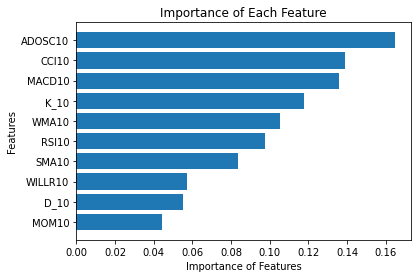

lose
2412  company


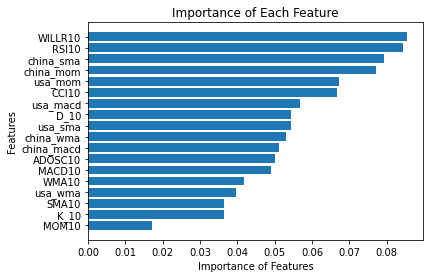

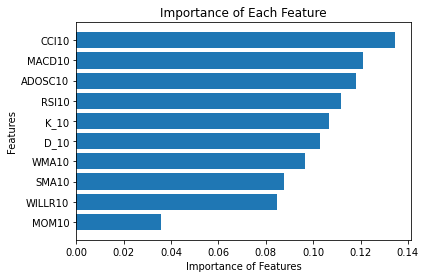

lose
2330  company


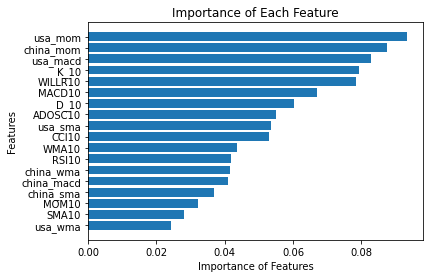

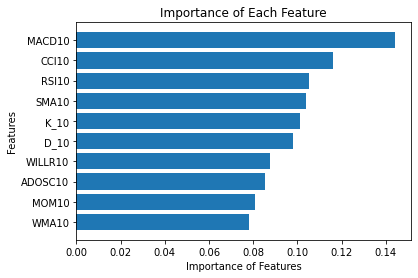

win
2454  company


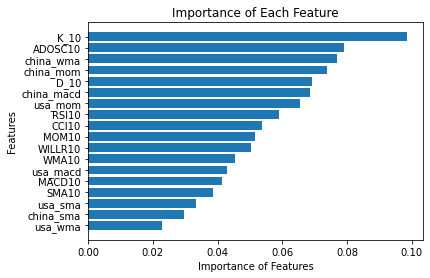

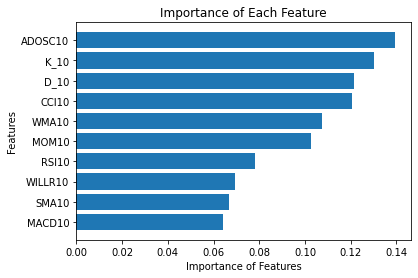

win
2308  company


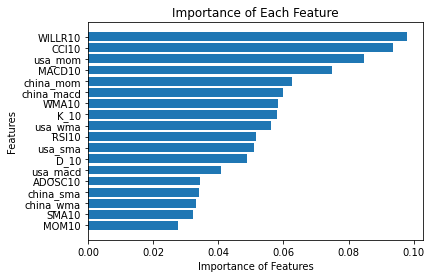

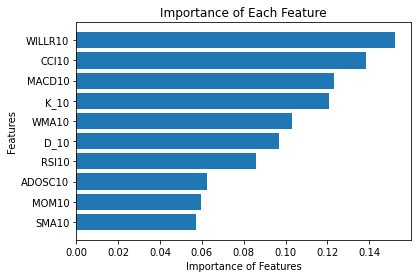

lose
2327  company


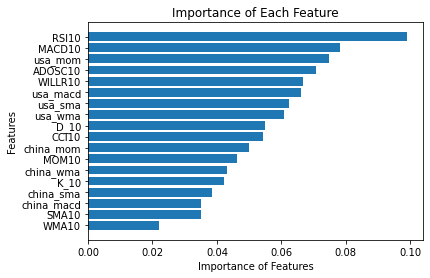

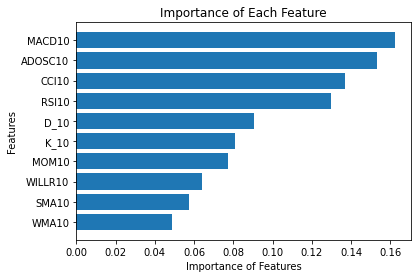

win
2379  company


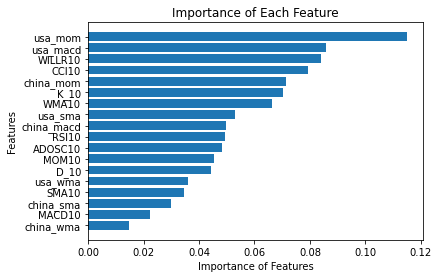

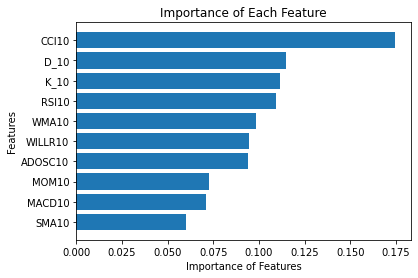

lose
2363  company


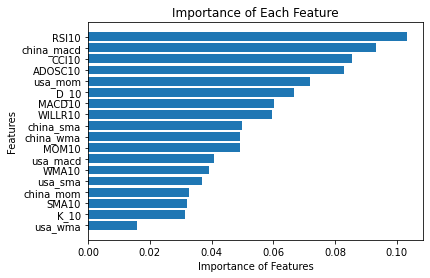

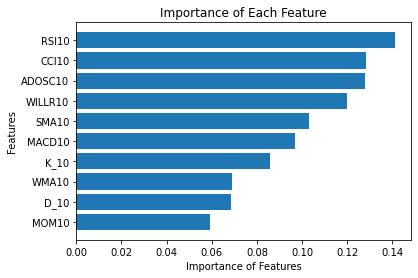

win
1217  company


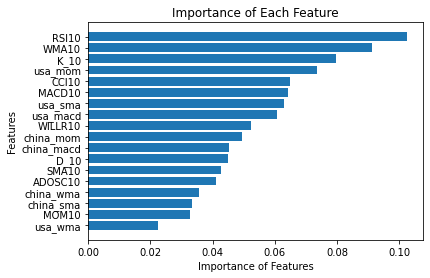

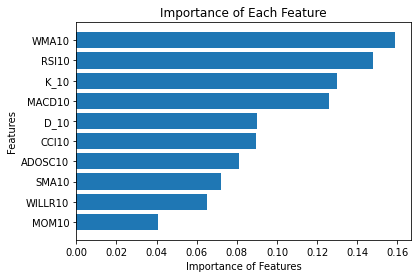

lose
1215  company


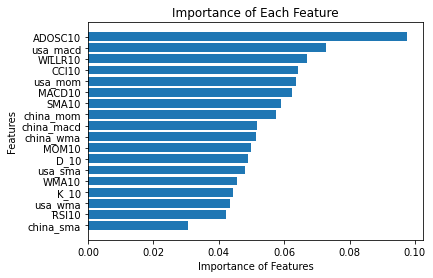

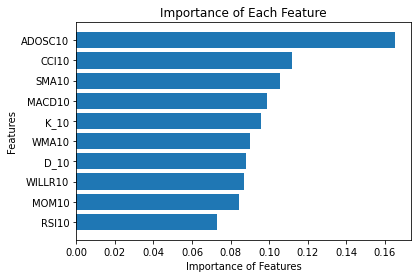

win
1231  company


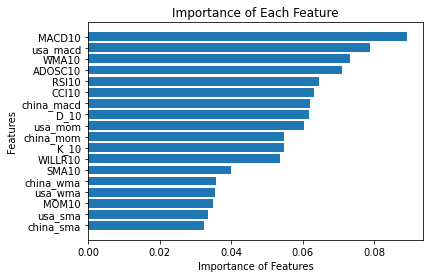

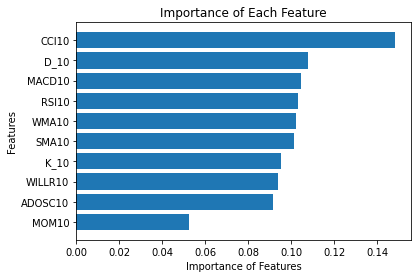

win
1301  company


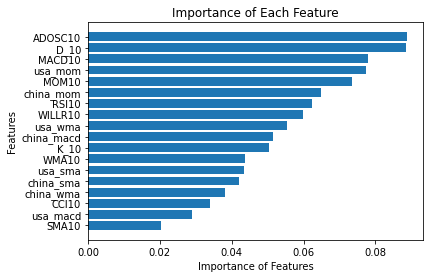

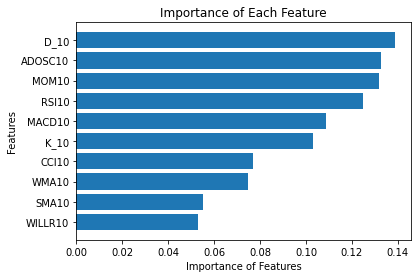

win
1310  company


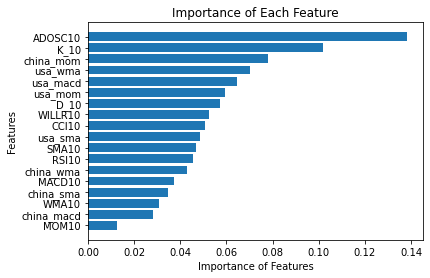

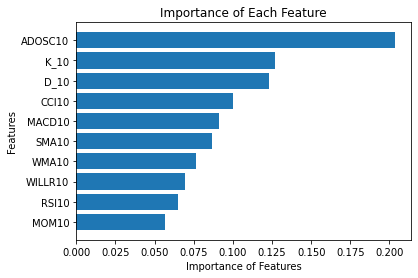

win
-------------------------------------------------
2430  company
train_acc 0.8009669621273167
test_acc 0.4878048780487805
train_acc_sub 0.7767929089443997
test_acc_sub 0.5365853658536586
lose
-------------------------------------------------
6281  company
train_acc 0.8420628525382756
test_acc 0.5121951219512195
train_acc_sub 0.814665592264303
test_acc_sub 0.5234521575984991
lose
-------------------------------------------------
2412  company
train_acc 0.8186946011281225
test_acc 0.474671669793621
train_acc_sub 0.8106365834004835
test_acc_sub 0.6360225140712945
lose
-------------------------------------------------
2330  company
train_acc 0.8452860596293312
test_acc 0.5234521575984991
train_acc_sub 0.8646253021756648
test_acc_sub 0.4915572232645403
win
-------------------------------------------------
2454  company
train_acc 0.8541498791297341
test_acc 0.49906191369606
train_acc_sub 0.8364222401289283
test_acc_sub 0.49906191369606
win
-------------------------------------------------

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train = ML_list[i].iloc[:split_point,:].copy()
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=GradientBoostingClassifier()
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(clf.score(train_X,train_y))
    test_acc.append(clf.score(test_X,test_y))
    imp2=clf.feature_importances_
    names=train_X.columns
    zip(imp,names)
    imp2, names= zip(*sorted(zip(imp2,names)))
    plt.barh(range(len(names)),imp2,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_subrate_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train =ML_subrate_list[i].iloc[:split_point,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=GradientBoostingClassifier()
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(clf.score(train_X,train_y))
    test_acc_sub.append(clf.score(test_X,test_y))
    imp3=clf.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp3, names= zip(*sorted(zip(imp3,names)))
    plt.barh(range(len(names)),imp3,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
    else:
        print('lose')
    
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

# LogisticRegression

2430  company

lose
6281  company

win
2412  company

win
2330  company

win
2454  company

win
2308  company

win
2327  company

win
2379  company

win
2363  company

win
1217  company

win
1215  company

win
1231  company


/home/mlb/users/jeffyacheng/stock/bin/Jeff/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



win
1301  company

win
1310  company

win
-------------------------------------------------
2430  company
train_acc 0.5995165189363416
test_acc 0.5290806754221389
train_acc_sub 0.5979049153908138
test_acc_sub 0.5309568480300187
lose
-------------------------------------------------
6281  company
train_acc 0.5858178887993554
test_acc 0.5440900562851783
train_acc_sub 0.5962933118452861
test_acc_sub 0.5422138836772983
win
-------------------------------------------------
2412  company
train_acc 0.5342465753424658
test_acc 0.5384615384615384
train_acc_sub 0.5342465753424658
test_acc_sub 0.5384615384615384
win
-------------------------------------------------
2330  company
train_acc 0.5181305398871877
test_acc 0.5121951219512195
train_acc_sub 0.5181305398871877
test_acc_sub 0.5121951219512195
win
-------------------------------------------------
2454  company
train_acc 0.5205479452054794
test_acc 0.5309568480300187
train_acc_sub 0.5205479452054794
test_acc_sub 0.5309568480300187
win
------

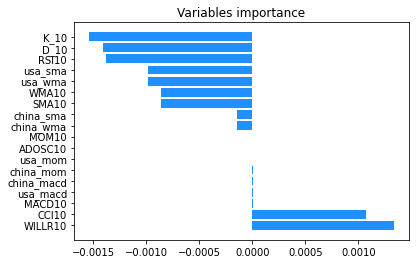

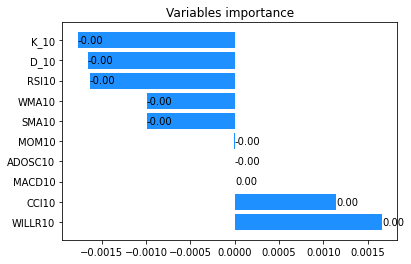

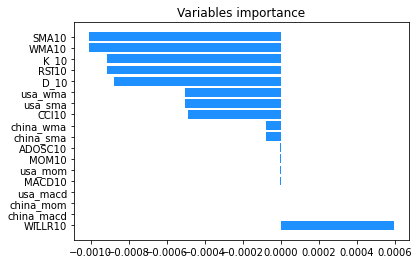

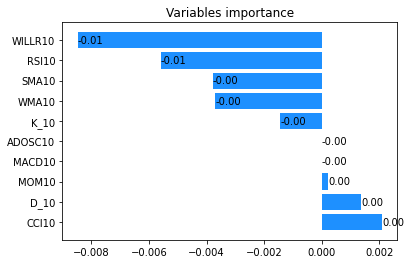

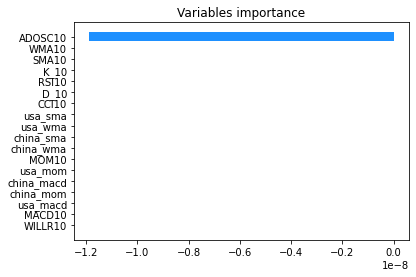

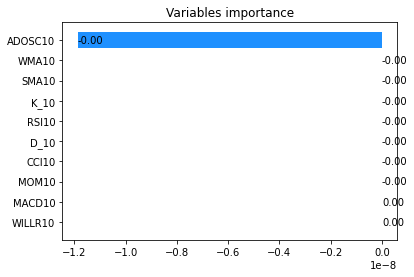

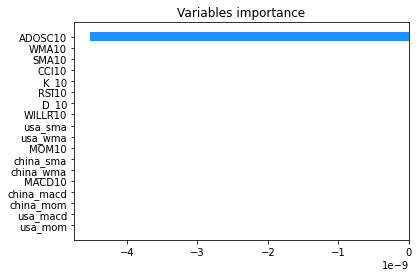

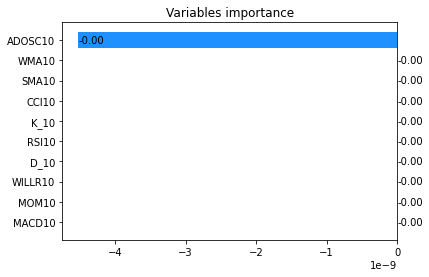

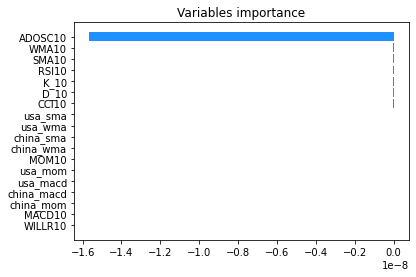

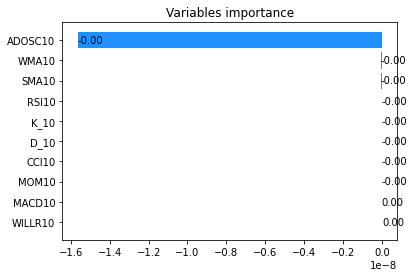

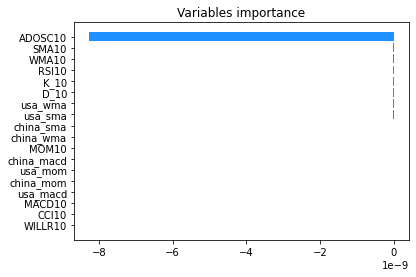

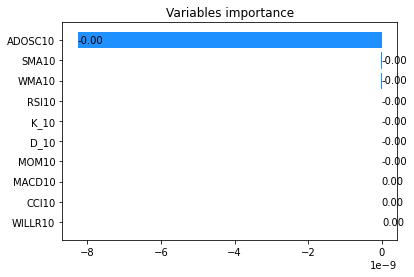

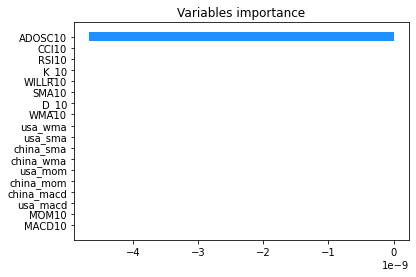

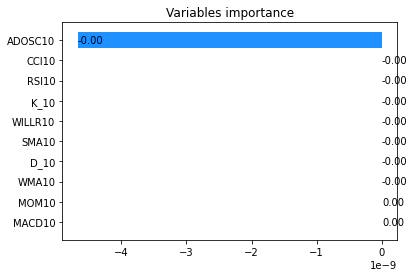

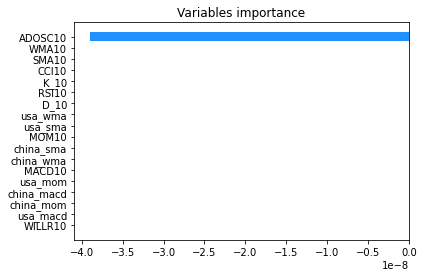

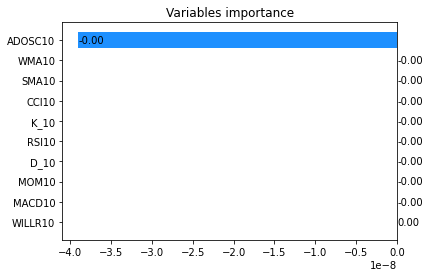

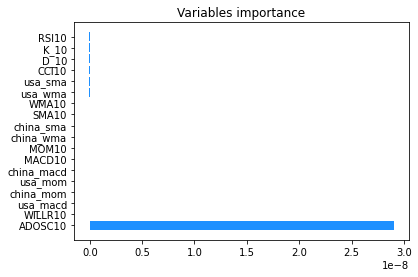

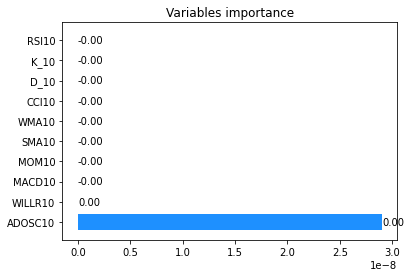

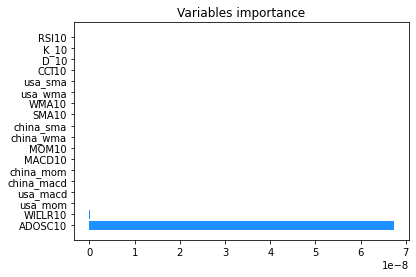

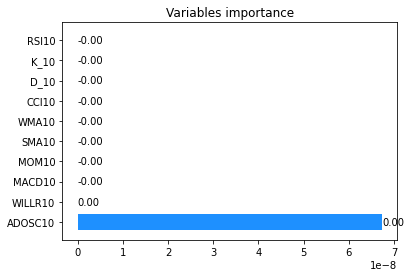

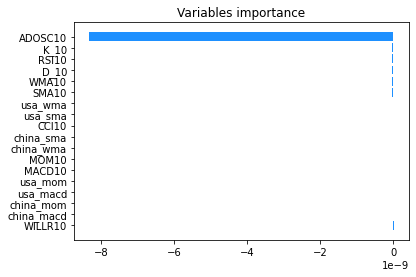

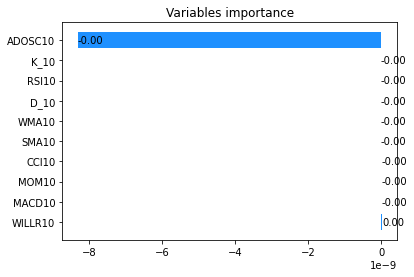

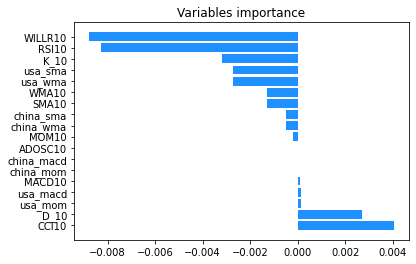

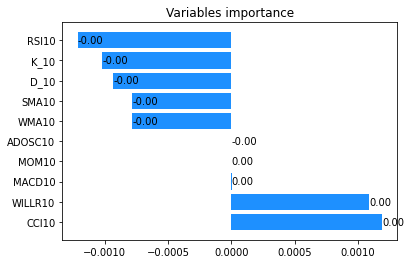

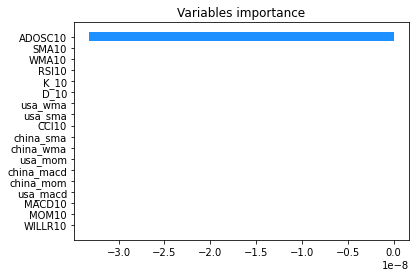

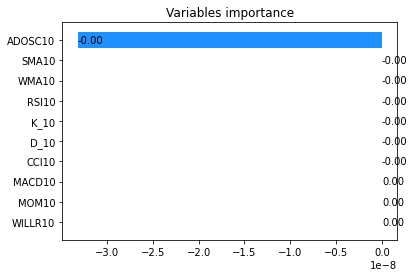

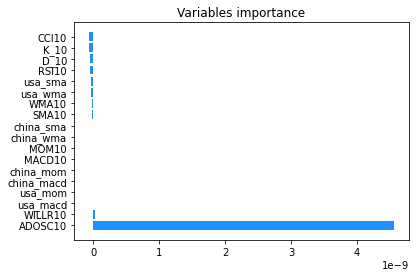

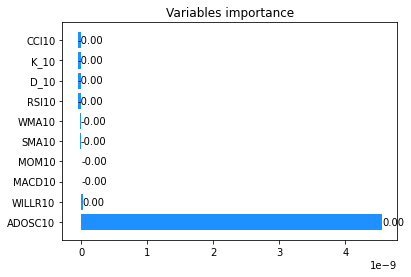

In [21]:

from sklearn import linear_model


test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train = ML_list[i].iloc[:split_point,:].copy()
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=linear_model.LogisticRegression()
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(clf.score(train_X,train_y))
    test_acc.append(clf.score(test_X,test_y))
    coef_lr=pd.DataFrame({'Var':train_X.columns,'coef':clf.coef_.flatten()})
    index_sort=np.abs(coef_lr['coef'].sort_values(ascending=False).index)
    coef_lr_sort=coef_lr.loc[index_sort,:]
    fig,ax=plt.subplots()
    x,y=coef_lr_sort['Var'],coef_lr_sort['coef']
    rects=plt.barh(x,y,color='dodgerblue')
    plt.grid(linestyle='',axis='y',alpha=1)
    plt.tight_layout
    plt.title('Variables importance')
    
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_subrate_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train =ML_subrate_list[i].iloc[:split_point,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    

    
    clf=linear_model.LogisticRegression()
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(clf.score(train_X,train_y))
    test_acc_sub.append(clf.score(test_X,test_y))
    
    coef_lr=pd.DataFrame({'Var':train_X.columns,'coef':clf.coef_.flatten()})
    index_sort=np.abs(coef_lr['coef'].sort_values(ascending=False).index)
    coef_lr_sort=coef_lr.loc[index_sort,:]
    fig,ax=plt.subplots()
    x,y=coef_lr_sort['Var'],coef_lr_sort['coef']
    rects=plt.barh(x,y,color='dodgerblue')
    plt.grid(linestyle='',axis='y',alpha=1)
    plt.tight_layout
    plt.title('Variables importance')
    for rect in rects:
        w=rect.get_width()
        ax.text(w,rect.get_y()+rect.get_height()/2,'%.2f'%w,ha='left',va='center')
    print()
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
    else:
        print('lose')
    
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

# DecisionTree

2430  company


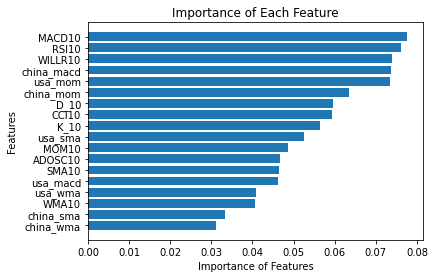

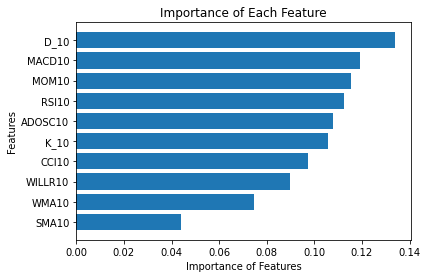

lose
6281  company


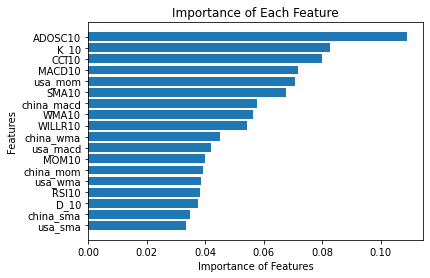

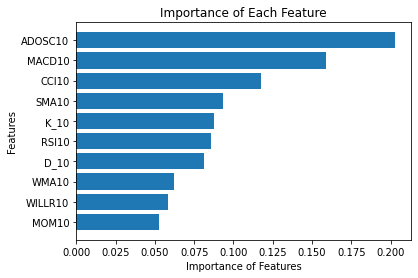

win
2412  company


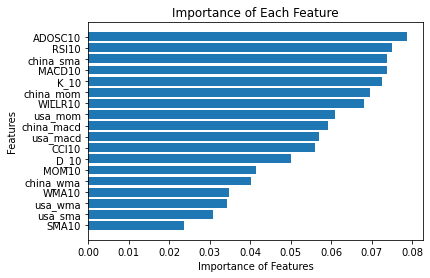

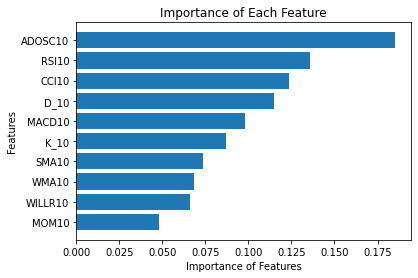

lose
2330  company


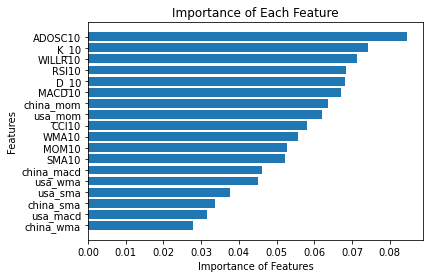

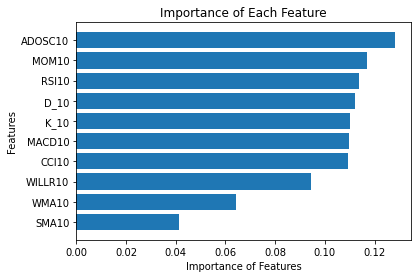

win
2454  company


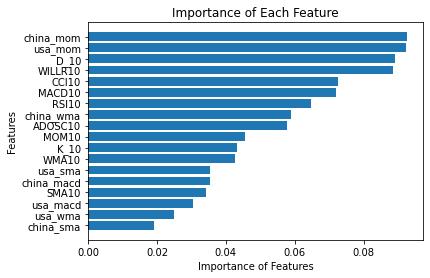

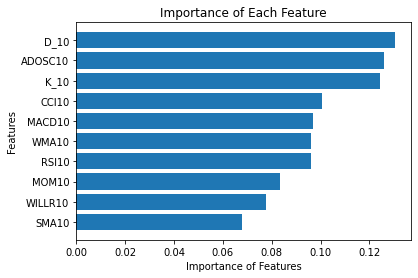

lose
2308  company


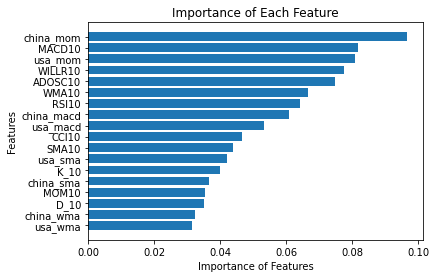

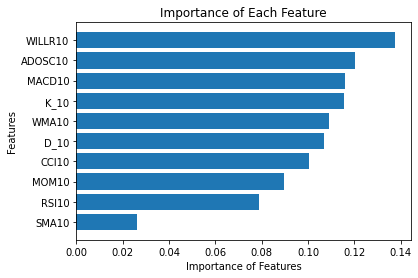

win
2327  company


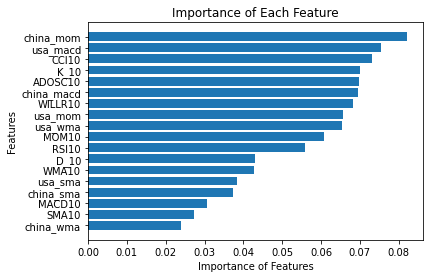

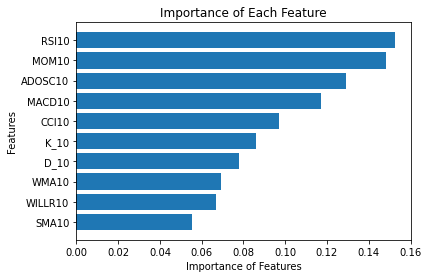

win
2379  company


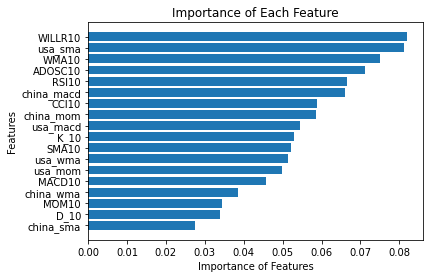

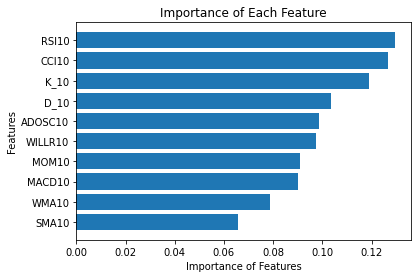

win
2363  company


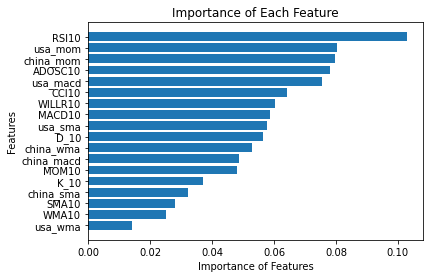

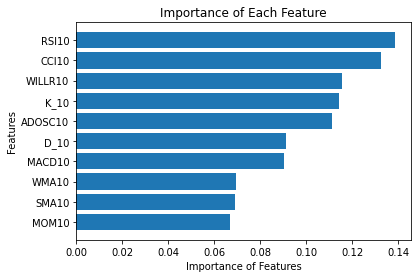

win
1217  company


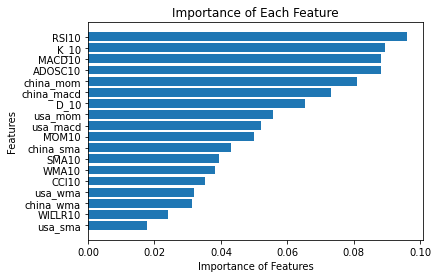

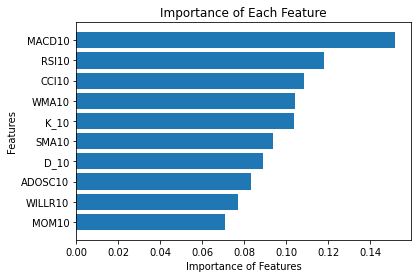

win
1215  company


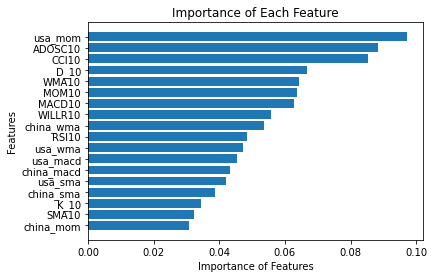

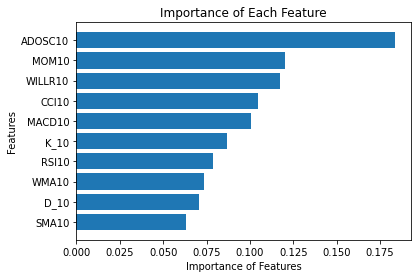

lose
1231  company


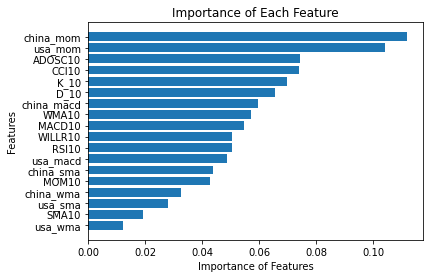

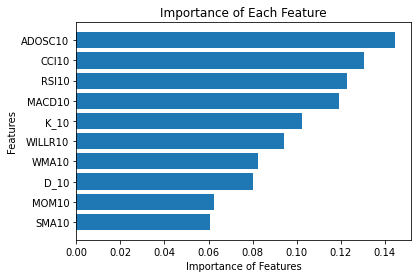

win
1301  company


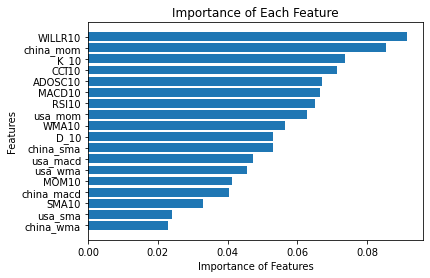

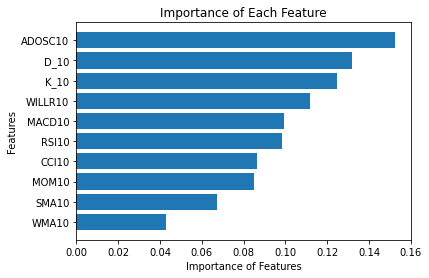

win
1310  company


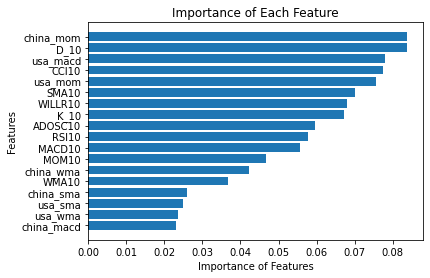

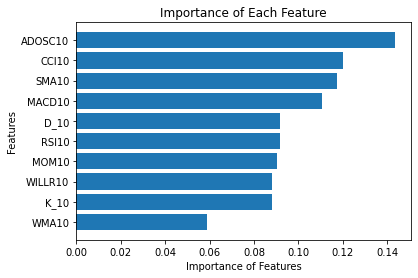

win
-------------------------------------------------
2430  company
train_acc 1.0
test_acc 0.46153846153846156
train_acc_sub 1.0
test_acc_sub 0.5028142589118199
lose
-------------------------------------------------
6281  company
train_acc 1.0
test_acc 0.525328330206379
train_acc_sub 1.0
test_acc_sub 0.5215759849906192
win
-------------------------------------------------
2412  company
train_acc 1.0
test_acc 0.5121951219512195
train_acc_sub 1.0
test_acc_sub 0.5609756097560976
lose
-------------------------------------------------
2330  company
train_acc 1.0
test_acc 0.5140712945590994
train_acc_sub 1.0
test_acc_sub 0.48405253283302063
win
-------------------------------------------------
2454  company
train_acc 1.0
test_acc 0.5065666041275797
train_acc_sub 1.0
test_acc_sub 0.5121951219512195
lose
-------------------------------------------------
2308  company
train_acc 1.0
test_acc 0.4803001876172608
train_acc_sub 1.0
test_acc_sub 0.474671669793621
win
---------------------------------

In [22]:
from sklearn import tree   #載入模型


test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train = ML_list[i].iloc[:split_point,:].copy()
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=tree.DecisionTreeClassifier(criterion='entropy')
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(clf.score(train_X,train_y))
    test_acc.append(clf.score(test_X,test_y))
    
    imp=clf.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp, names= zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    
    
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_subrate_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train =ML_subrate_list[i].iloc[:split_point,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=tree.DecisionTreeClassifier(criterion='entropy')
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(clf.score(train_X,train_y))
    test_acc_sub.append(clf.score(test_X,test_y))
    imp=clf.feature_importances_
    original_feature=train_X.columns
    names=train_X.columns
    zip(imp,names)
    imp, names= zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
    else:
        print('lose')
    
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

test_acc=list()
train_acc=list()
test_acc_sub=list()
train_acc_sub=list()
for i in range(len(ML_list)):
    #print ("-------------------------------------------------")
    print(company[i],' company')
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train = ML_list[i].iloc[:split_point,:].copy()
    test = ML_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    model = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=6)
    clf=AdaBoostClassifier(base_estimator=model)
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc.append(clf.score(train_X,train_y))
    test_acc.append(clf.score(test_X,test_y))
    
    
    # 決定切割比例為 80%:20%
    split_point = int(len(ML_subrate_list[i])*0.7)
    # 切割成學習樣本以及測試樣本
    train =ML_subrate_list[i].iloc[:split_point,:].copy()
    test = ML_subrate_list[i].iloc[split_point:,:].copy()
    # 訓練樣本再分成目標序列 y 以及因子矩陣 X
    train_X = train.drop('up_and_down', axis = 1)
    train_y = train.up_and_down
    # 測試樣本再分成目標序列 y 以及因子矩陣 X
    test_X = test.drop('up_and_down', axis = 1)
    test_y = test.up_and_down
    
    clf=AdaBoostClassifier()
    #print(train_X)
    clf.fit(train_X,train_y)
    #print('train accuracy',rfc.score(train_X,train_y))
    #print('test accuracy',rfc.score(test_X,test_y))
    train_acc_sub.append(clf.score(train_X,train_y))
    test_acc_sub.append(clf.score(test_X,test_y))    
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
    else:
        print('lose')
    
win_list=list()
for i in range(len(test_acc)):
    print ("-------------------------------------------------")
    print(company[i],' company')
    print('train_acc',train_acc[i])
    print('test_acc',test_acc[i])
    print('train_acc_sub',train_acc_sub[i])
    print('test_acc_sub',test_acc_sub[i])
    if test_acc[i]>=test_acc_sub[i]:
        print('win')
        win_list.append('win')
    else:
        print('lose')
        win_list.append('lose')
print(win_list)

2430  company
lose
6281  company
win
2412  company
lose
2330  company
win
2454  company
win
2308  company
lose
2327  company
lose
2379  company
win
2363  company
win
1217  company
win
1215  company
lose
1231  company
lose
1301  company
lose
1310  company
win
-------------------------------------------------
2430  company
train_acc 1.0
test_acc 0.5290806754221389
train_acc_sub 0.6736502820306205
test_acc_sub 0.5347091932457786
lose
-------------------------------------------------
6281  company
train_acc 1.0
test_acc 0.5609756097560976
train_acc_sub 0.6752618855761483
test_acc_sub 0.5290806754221389
win
-------------------------------------------------
2412  company
train_acc 1.0
test_acc 0.5609756097560976
train_acc_sub 0.6752618855761483
test_acc_sub 0.6341463414634146
lose
-------------------------------------------------
2330  company
train_acc 1.0
test_acc 0.49906191369606
train_acc_sub 0.6760676873489122
test_acc_sub 0.4915572232645403
win
-----------------------------------------